Median_house_value prediction model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.shape

(20640, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we can see there are missing values in total_bedrooms, so lets fill them with mean

In [6]:
data['total_bedrooms'].mean()

537.8705525375618

In [7]:
data['total_bedrooms'].fillna(value =data['total_bedrooms'].mean(), inplace = True )

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Null values are filled with mean.

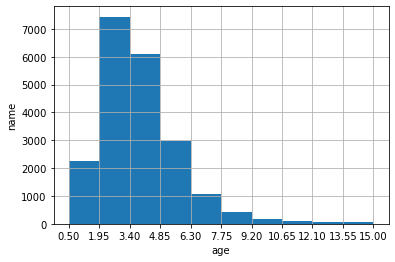

In [9]:
count,bin_edges = np.histogram(data['median_income'])
data['median_income'].plot(kind= 'hist',xticks = bin_edges)
plt.xlabel('age')
plt.ylabel('name')
plt.grid(10)
plt.show()

Here we can observe that the data is skewed.

<AxesSubplot:ylabel='households'>

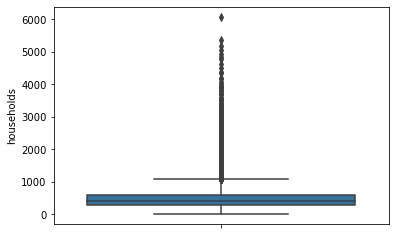

In [10]:
sns.boxplot(y = "households",data = data)

There are lot of outliers in the feature 'households'

<AxesSubplot:>

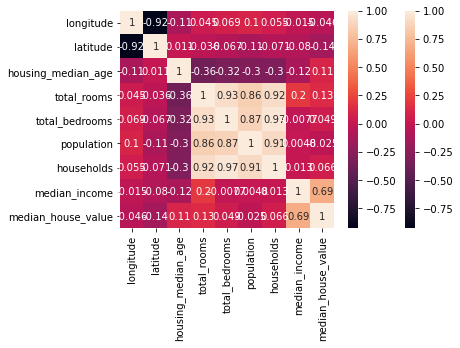

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot = True)
sns.heatmap(correlation_matrix)

There is a good correlation of 0.69 between median_income and median_house_value

In [12]:
data = pd.get_dummies(data,columns = ['ocean_proximity'],drop_first = True)

In [13]:
data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0


In [14]:
x = data.drop(['median_house_value'],axis = 1)
y = data['median_house_value'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
multiple_reg.coef_

array([[-2.68382734e+04, -2.54683520e+04,  1.10218508e+03,
        -6.02150567e+00,  1.02789395e+02, -3.81729064e+01,
         4.82527528e+01,  3.94739752e+04, -3.97866562e+04,
         1.36125073e+05, -5.13664222e+03,  3.43114007e+03]])

In [19]:
multiple_reg.intercept_

array([-2275547.38171655])

In [20]:
y_pred = multiple_reg.predict(x_test)

In [21]:
multiple_reg.score(x_train,y_train)

0.6496648627123223